In [1]:
import numpy as np
import pandas as pd 
import cv2 as cv
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

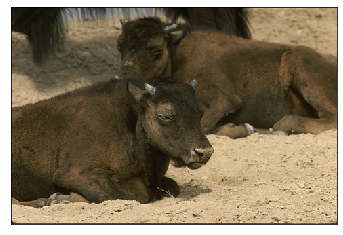

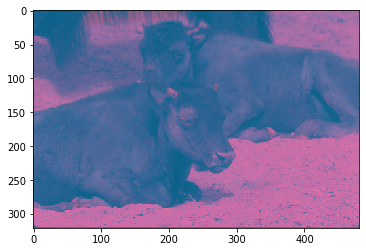

In [2]:
img=cv.imread('41033.jpg')
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.imshow(img) 
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()
pic=cv.cvtColor(img,cv.COLOR_RGB2LUV)
plt.imshow(pic) 

In [3]:
#resize the image
img = cv.resize(pic, dsize=(200, 200)) 

#
# rearange the image array with the block size of four
#

i=0
j=0
luv=[]

for h in range(100):
    j=0
    for k in range(100):         
        luv.append([
            [img[i,j,0],img[i+1,j,0],img[i,j+1,0],img[i+1,j+1,0]],
            [img[i,j,1],img[i+1,j,1],img[i,j+1,1],img[i+1,j+1,1]],
            [img[i,j,2],img[i+1,j,2],img[i,j+1,2],img[i+1,j+1,2]]
        ]) 
        
        j=j+2
    i=i+2 
    
luva=np.reshape(np.array(luv),(100,100,3,4))
print('luva.shape',luva.shape)

# re-asign the new array format to the image
pic=luva
print('pic.shape',pic.shape)

pic_n = pic.reshape(pic.shape[0]*pic.shape[1]* pic.shape[2], pic.shape[3])
print('pic_n.shape',pic_n.shape)


luva.shape (100, 100, 3, 4)
pic.shape (100, 100, 3, 4)
pic_n.shape (30000, 4)


In [4]:
import time as t
clusterssize=[2,3,4,5,6,7,8,9,10]
timearray=[]
error=[]
segementedImg=[]

In [5]:
for i in clusterssize:
    
    start=t.time()
    kmeans = KMeans(n_clusters=i, random_state=0).fit(pic_n)
    timearray.append(t.time()-start)
    segementedImg.append(kmeans.labels_)
    pic2show = kmeans.cluster_centers_[kmeans.labels_]
    
    cluster_pic = pic2show.reshape(pic.shape[0],pic.shape[1], pic.shape[2], pic.shape[3])
    
    error.append(np.linalg.norm(pic-cluster_pic))
    print(i)

2
3
4
5
6
7
8
9
10


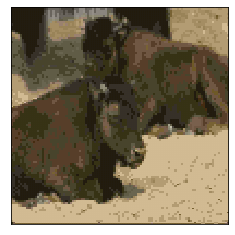

In [6]:
#convert back the clustered image to the original form 
#decoding

temp=np.zeros((200,200,3))
i=0
j=0
for h in range(100):
    j=0
    for k in range(100):
        val=cluster_pic[h,k,:,:]
        
        temp[i,j,0]=val[0][0]
        temp[i+1,j,0]=val[0][1]
        temp[i,j+1,0]=val[0][2]
        temp[i+1,j+1,0]=val[0][3]
        
        temp[i,j,1]=val[1][0]
        temp[i+1,j,1]=val[1][1]
        temp[i,j+1,1]=val[1][2]
        temp[i+1,j+1,1]=val[1][3]
        
        temp[i,j,2]=val[2][0]
        temp[i+1,j,2]=val[2][1]
        temp[i,j+1,2]=val[2][2]
        temp[i+1,j+1,2]=val[2][3]
                
        j=j+2
    i=i+2
    
    
temp=cv.cvtColor((temp).astype('uint8'),cv.COLOR_LUV2RGB)
plt.imshow(temp)
plt.xticks([])
plt.yticks([])
plt.imshow(temp)
plt.savefig('kmeans_SegementdIMg.jpg')
plt.show()

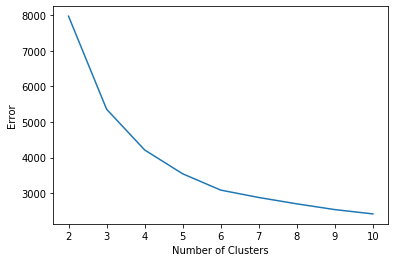

In [7]:
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.plot(clusterssize,error)

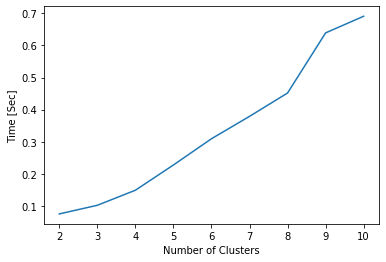

In [8]:
plt.xlabel('Number of Clusters')
plt.ylabel('Time [Sec]')

plt.plot(np.arange(2,11,1),timearray)
np.savetxt("kmeans_timearray.csv", timearray, delimiter=",")
np.savetxt("kmeans_segementedImg.csv", segementedImg, delimiter=",")